## Implementation of Bredth-First Search algorithm for finding rings in molecular graphs
As implemented by Figuereas, 1996

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt

##### Create a networkx graph

In [4]:
%%html
<p>The following ring structured will be used:</p>
<img src="./images/rings_1.jpg" width=500>

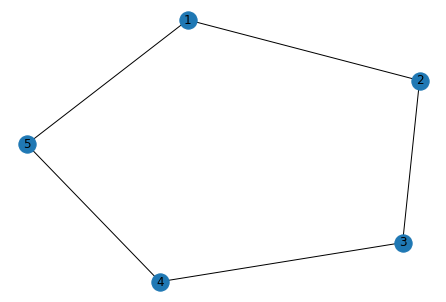

In [2]:
G1 = nx.MultiGraph()
G1.add_nodes_from([1,2,3,4,5])
keys = G1.add_edges_from([(1,2),(1,5),(2,3),(3,4),(4,5)])
nx.draw(G1, with_labels=True)
plt.show()

In [5]:
G1.nodes[1]['lump'] = 1

In [7]:
G1.nodes[2]

{}

In [6]:
%%html
<p>The second graph is based on the following structure:</p>
<img src="./images/rings_2.jpg" width=500>

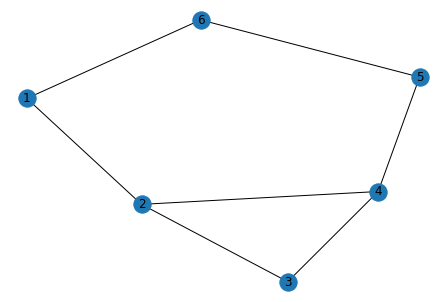

In [3]:
G2 = nx.MultiGraph()
G2.add_nodes_from([1,2,3,4,5,6])
keys = G2.add_edges_from([(1,2),(1,6),(2,3),(2,4),(3,4),(4,5),(5,6)])
nx.draw(G2, with_labels=True)
plt.show()

### The algorithm

In [4]:
def find_rings(molecular_graph):
    """Find all rings in a molecular graph"""
    rings = []
    for node in list(molecular_graph.nodes()):
        ringset = get_ring(molecular_graph, node)
        if ringset and ringset not in rings:
            rings.append(ringset)
    
    return rings

def get_ring(molecular_graph, root):
    """Find a ringset in a molecular graph starting from a root node. The output depends on the root node"""
    ringset = []
    queue = collections.deque([root, root])
    path = [None] * (len(molecular_graph.nodes()) + 1) #Initialize paths to null
    path[root] = [root]

    while queue:

        # Dequeue a node from front of queue
        front_node = queue.popleft()
        source = queue.popleft()

        for neighbor in molecular_graph.adj[front_node]:

            if neighbor == source:
                continue

            if path[neighbor] is None:
                path[neighbor] = path[front_node] + [neighbor]
                path[neighbor].sort()
                queue.append(neighbor)
                queue.append(front_node)

            elif path[neighbor] is not None:
                # Compute intersection
                intersect = intersection(path[front_node], path[neighbor])
                if len(intersect) == 1: # If the intersection is a singleton there is a valid ring closure
                    ringset = Union(path[front_node], path[neighbor])
                    break

        if ringset:
            break
    
    return ringset
    
def intersection(lst1, lst2):
    """Compute the intersection of two lists"""
    return list(set(lst1) & set(lst2))

def Union(lst1, lst2):
    """Union of two lists"""
    final_list = list(set(lst1) | set(lst2))
    return final_list

In [5]:
print('Ringset: ')
find_rings(G1)

Ringset: 


[[1, 2, 3, 4, 5]]

In [6]:
print('Ringset: ')
find_rings(G2)

Ringset: 


[[1, 2, 4, 5, 6], [2, 3, 4]]

### Testing other srtuctures

In [10]:
%%html
<p>The following ring structured will be used:</p>
<img src="./images/rings_4.jpg" width=250>

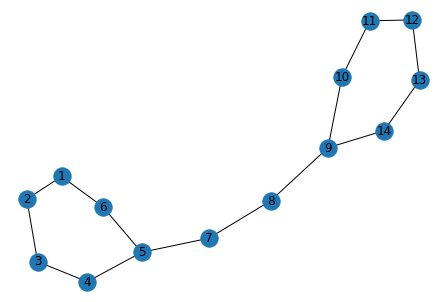

In [7]:
G3 = nx.MultiGraph()
G3.add_nodes_from(list(range(1,15)))
edge_list = [
    (1,2),
    (1,6),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (5,7),
    (7,8),
    (8,9),
    (9,10),
    (9,14),
    (10,11),
    (11,12),
    (12,13),
    (13,14)
]
keys = G3.add_edges_from(edge_list)
nx.draw(G3, with_labels=True)
plt.show()

In [8]:
print('Rings:')
find_rings(G3)

Rings:


[[1, 2, 3, 4, 5, 6], [9, 10, 11, 12, 13, 14]]

In [9]:
get_ring(G3, 7)

[]

In [11]:
%%html
<p>The following ring structured will be used:</p>
<img src="./images/rings_3.jpg" width=250>

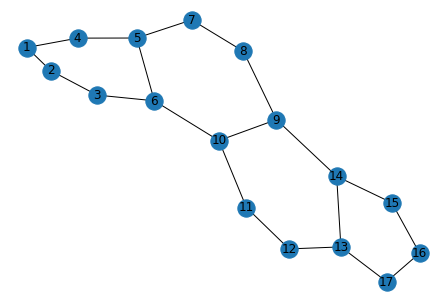

In [13]:
G4 = nx.MultiGraph()
G4.add_nodes_from(list(range(1,18)))
edge_list = [
    (1,2),
    (1,4),
    (2,3),
    (3,6),
    (4,5),
    (5,6),
    (5,7),
    (6,10),
    (7,8),
    (8,9),
    (9,10),
    (9,14),
    (10,11),
    (11,12),
    (12,13),
    (13,14),
    (13,17),
    (14,15),
    (15,16),
    (16,17)
]
keys = G4.add_edges_from(edge_list)
nx.draw(G4, with_labels=True)
plt.show()

In [11]:
print('Rings:')
find_rings(G4)

Rings:


[[1, 2, 3, 4, 5, 6],
 [5, 6, 7, 8, 9, 10],
 [9, 10, 11, 12, 13, 14],
 [16, 17, 13, 14, 15]]